# Simple Linear Regression : Salary Prediction

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading dataset
df = pd.read_csv('Salary_Data.xls')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


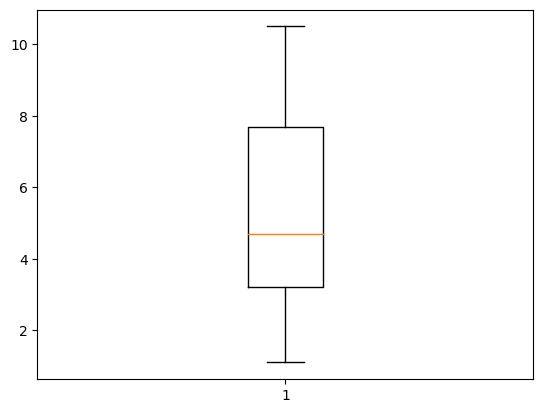

In [7]:
# checking for outliers in the dataset using boxplot
plt.boxplot(df['YearsExperience'])
plt.show()

In [10]:
# getting independent variable and response variable from dataset
X = df['YearsExperience'].values # independent variable
y = df['Salary'].values # response variable

In [11]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

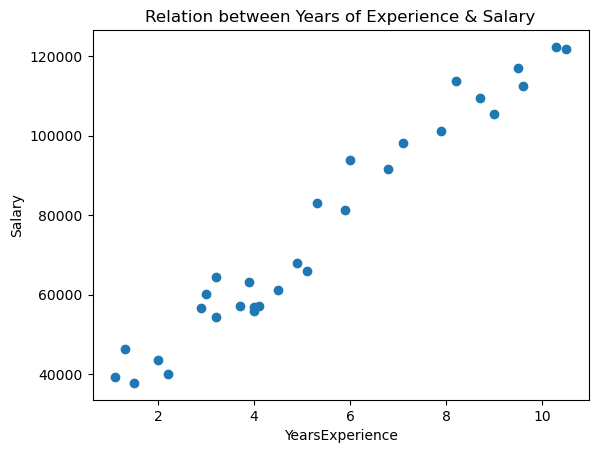

In [13]:
# knowing the relation between independent variable and response variable
plt.scatter(X,y)
plt.title('Relation between Years of Experience & Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [14]:
# choosing the machine learning model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
# choosing cross validation model for training and testing
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5,shuffle=True,random_state=2)

In [19]:
for train_index, test_index in k_fold.split(X):
    print(f'Train data index: {train_index}')
    print(f'Test data index: {test_index}')

Train data index: [ 2  3  4  5  6  7  8 10 11 12 13 15 16 17 18 20 22 23 24 25 26 27 28 29]
Test data index: [ 0  1  9 14 19 21]
Train data index: [ 0  1  2  4  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 24 25 26 28 29]
Test data index: [ 3  5  6 20 23 27]
Train data index: [ 0  1  2  3  5  6  7  8  9 11 13 14 15 17 18 19 20 21 22 23 24 26 27 29]
Test data index: [ 4 10 12 16 25 28]
Train data index: [ 0  1  3  4  5  6  8  9 10 11 12 13 14 15 16 19 20 21 22 23 25 27 28 29]
Test data index: [ 2  7 17 18 24 26]
Train data index: [ 0  1  2  3  4  5  6  7  9 10 12 14 16 17 18 19 20 21 23 24 25 26 27 28]
Test data index: [ 8 11 13 15 22 29]


In [24]:
# finding the cross validation score of the model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y,cv=k_fold)
cv_scores

array([0.88869567, 0.95580004, 0.95003761, 0.98429027, 0.9365608 ])

In [25]:
# mean of cross validation score
cv_scores.mean()

0.94307687798817

In [29]:
# getting the predicted value by the model
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(model,X,y,cv=k_fold)
y_predict

array([[ 34919.71472592],
       [ 36833.63210301],
       [ 40177.03934018],
       [ 43970.03583768],
       [ 47768.87337762],
       [ 52483.04503801],
       [ 53428.93494916],
       [ 56031.28228442],
       [ 56456.77179126],
       [ 59800.64062805],
       [ 63791.99912232],
       [ 64068.36307476],
       [ 64734.53593083],
       [ 65019.81198519],
       [ 67456.3101364 ],
       [ 72631.40326869],
       [ 75102.44082447],
       [ 75615.93533319],
       [ 81211.55048998],
       [ 81810.69046455],
       [ 89372.75157278],
       [ 92337.23603852],
       [101174.8705818 ],
       [102615.21032885],
       [107324.42122167],
       [111861.37635644],
       [114785.24143072],
       [115857.66908492],
       [124114.3548671 ],
       [125912.54225315]])

In [36]:
# measuring the performance of the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
r2 = r2_score(y,y_predict)
mae = mean_absolute_error(y,y_predict)
mape = mean_absolute_percentage_error(y,y_predict)
mse = mean_squared_error(y,y_predict)
rmse = np.sqrt(mse)
print(f'R2 Score: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')

R2 Score: 0.9497278011098109
MAE: 5041.355743426463
MAPE: 0.07650066794431362
RMSE: 6043.402632576591
